In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost
import seaborn as sns
import tensorflow as tf

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import  classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('dataframe shape : ' ,df_train.shape)
print(df_train.info())

dataframe shape :  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Get the descriptive statistics
df_train.describe() # it ignores NULL values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking the missing values
missing = df_train.isna().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#  Get the duplicate rows
dupplicated_rows_df = df_train[df_train.duplicated()]

# Dupplicated_rows_df's shape
print("dupplicated_rows_df's shape : ", dupplicated_rows_df.shape)

dupplicated_rows_df's shape :  (0, 12)


In [ ]:
# the 'Name' feature has no effect on the target
df_train.drop(['Name'], axis=1, inplace=True)

In [ ]:
# replace 'Nan' values with 'no_cabin' in cabin feature
df_train['Cabin'].fillna('no_cabin', inplace=True)
#replace the missing value in the age feature with the median because we have a small data we can't delete the rows of missing values
median_value = df_train['Age'].median()  # Get the median value
df_train['Age'].fillna(median_value, inplace=True)

In [ ]:
# Get categorical features
cat_features = df_train.select_dtypes(include=[object]).columns
print('catgorical features : ',cat_features)
df_cat=df_train.select_dtypes(include=['object'])
# get numerical features :
num_features = df_train.select_dtypes(include=[np.number]).columns
print('numerical features : ',num_features)
df_num=df_train.select_dtypes(include=[np.number])

catgorical features :  Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
numerical features :  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


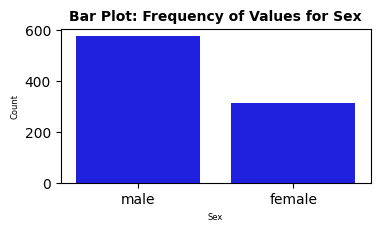

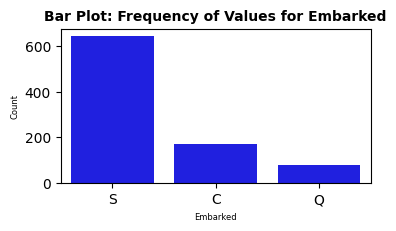

In [ ]:
# Count the frequency of the category 'sex' and 'Embarked' separately
for col in ['Sex', 'Embarked']:
    category_counts = df_cat[col].value_counts()

    # Plot the bar plot for the current column
    plt.figure(figsize=(4, 2))
    sns.barplot(x=category_counts.index, y=category_counts.values, color='blue')

    # Add title and labels specific to the column
    plt.title(f'Bar Plot: Frequency of Values for {col}', fontsize=10, weight='bold')
    plt.xlabel(col, fontsize=6)
    plt.ylabel('Count', fontsize=6)
    plt.show()

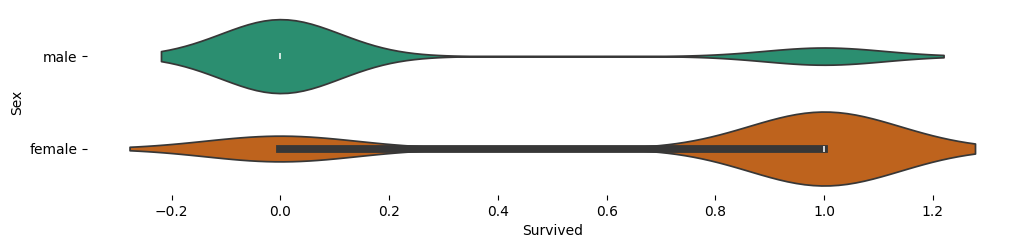

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_train['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_train, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

as we can see the number of male in the titanic is more than female but the thenu number of survived female is lore than the male

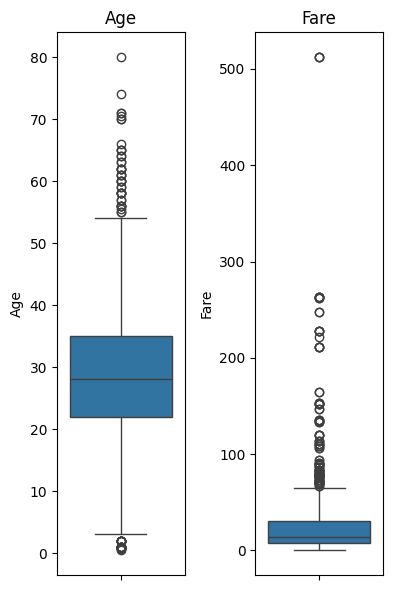

Q1=22.000, Q3=35.000, IQR=13.000, lower=2.500, upper=54.500
Number of outliers Age =  66
Q1=7.910, Q3=31.000, IQR=23.090, lower=-26.724, upper=65.634
Number of outliers Fare =  116


In [ ]:
def outlier_detection(df, variable):

    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1

    #lower and upper limits
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    print(f'Q1={q1:.3f}, Q3={q3:.3f}, IQR={iqr:.3f}, lower={lower:.3f}, upper={upper:.3f}')


    outliers = []
    for index, x in enumerate(df[variable]):
        if x <= lower or x >= upper:
            outliers.append(index)
    return outliers

#detecting outliers :
plt.figure(figsize=(8, 6))
num_features_len = len([ 'Age', 'Fare'])
num_cols = 4
num_rows = (num_features_len + num_cols - 1) // num_cols


for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(num_rows, num_cols,i+ 1)
    sb.boxplot(data=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

outliers = outlier_detection(df_train, 'Age')
print("Number of outliers Age = ", len(outliers))
outliers = outlier_detection(df_train, 'Fare')
print("Number of outliers Fare = ", len(outliers))

In [ ]:
# Define the custom order mapping

custom_order = {
    0:'dead',
    1:'lived',
}

# Apply the mapping to the Class column
df_train['Survived_coded'] = df_train['Survived'].map(custom_order)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_coded
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,no_cabin,S,dead
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,lived
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,no_cabin,S,lived
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,lived
4,5,0,3,male,35.0,0,0,373450,8.0500,no_cabin,S,dead


In [ ]:
cat_features = cat_features.tolist()  # Convert Index to list
cat_features.append('Survived_coded') # Append the string to the list
cat_features = pd.Index(cat_features) # Convert the list back to Index

We define the cramers_v function to determine the correlation between categorical variables :

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

import scipy.stats as ss
cramers_v_matrix = pd.DataFrame(index=cat_features, columns=cat_features)
for col1 in cat_features:
    for col2 in cat_features:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_train[col1], df_train[col2])

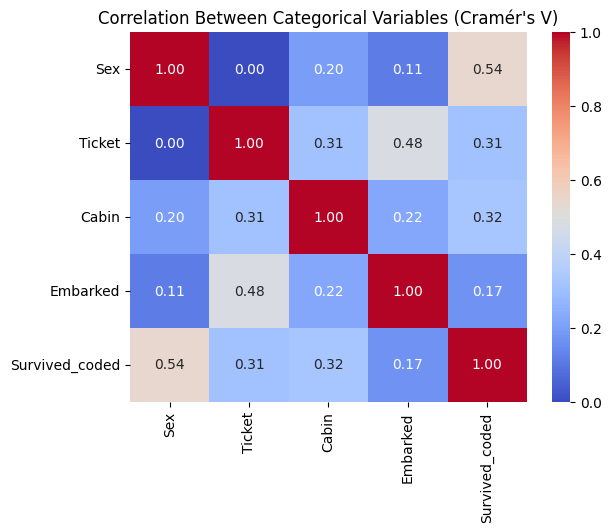

In [ ]:
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Categorical Variables (Cramér's V)")
plt.show()

- there is no high correlation between features

In [ ]:
# Correlation of target variable `'Class` with other numerical  variables
cramers_v_matrix.astype(float)['Survived_coded'].sort_values(ascending=False)


,Survived_coded
Survived_coded,0.997625
Sex,0.540200
Cabin,0.324698
Ticket,0.310501
Embarked,0.166058


- sex , cabin and ticket has moderate correlation with the target

- Embarked has a low correlation with the target

<Axes: >

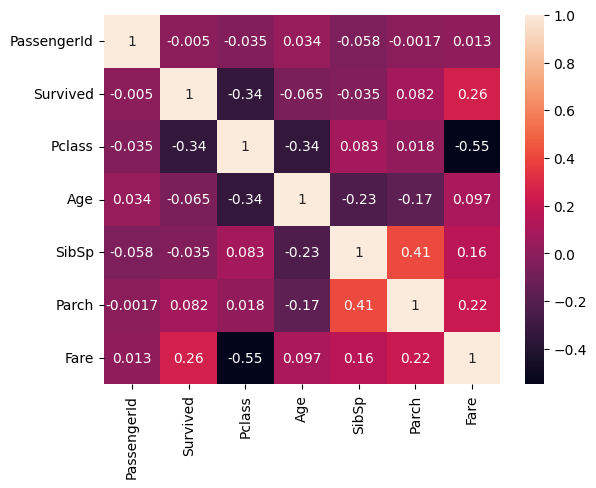

In [ ]:
# Correlation between numerical variables :
corr_matrix = df_train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# Correlation of target variable `'Class` with other numerical  variables
abs(corr_matrix.astype(float)['Survived']).sort_values(ascending=False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.064910
SibSp,0.035322
PassengerId,0.005007



- Pclass has moderate correlation (0.338), followed by Fare (0.257), they  contribute meaningfully to predicting the target.



- passsengerID ,sibsp , age , and parch  have a low correlation of with the target variable,they might not add value to prediction.

# 2.data preparation

In [ ]:
#there is rows with missing values in 'Embarked' features , we drop them using dropna() function
df_train.dropna(inplace = True)
df_train.drop(['Survived_coded','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

In [ ]:
# Define the custom order mapping

custom_order = {
    'male' : 1,
    'female' : 0,
}

# Apply the mapping to the Class column
df_train['Sex'] = df_train['Sex'].map(custom_order)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
X = df_train.drop(["Survived",], axis=1) # input variables (X is dataframe)
y = df_train["Survived"].to_numpy() # output variable (y is an array)


# Get categorical features
cat_features = X.select_dtypes(include=[object]).columns

# get numerical features
num_features = X.select_dtypes(include=[np.number]).columns

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True,random_state=42)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))
print('y_train:', np.shape(y_train), 'y_test:', np.shape(y_test))

X_train: (711, 7) X_test: (178, 7)
y_train: (711,) y_test: (178,)


In [ ]:
num_pipeline = Pipeline([("transformer", PowerTransformer(method='yeo-johnson', standardize=True))])

full_pipeline = ColumnTransformer([("num", num_pipeline, num_features), ("cat", OneHotEncoder(), cat_features)])

1 -num_pipeline:

- This pipeline applies a PowerTransformer with the method set to 'yeo-johnson' and standardization enabled to numerical features.

- The PowerTransformer is used to transform numerical data to be more normally distributed

- The standardize=True parameter ensures that the transformed data will have a mean of 0 and a standard deviation of 1.

2- full_pipeline:

- This pipeline uses a ColumnTransformer,  which applies different preprocessing steps to different subsets of features in the dataset.

- the OneHotEncoder is applied to convert each category into a binary vector.

In [ ]:
# train the full_pipeline on training data
full_pipeline = full_pipeline.fit(X_train)

# Apply full_pipeline on training and testing sets
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

print("\n X_train:", X_train.shape, "X_test:", X_test.shape)



 X_train: (711, 9) X_test: (178, 9)


In [ ]:
#logistique regresion
LR = LogisticRegression(random_state=22)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
LR_score=  accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_LR))
from sklearn.metrics import f1_score
print('F1 score : ', f1_score(y_test, y_pred_LR, average=None))
cmm = metrics.confusion_matrix(y_test, y_pred_LR)
print(cmm)

Logistic Regression Accuracy: 0.797752808988764
F1 score :  [0.83 0.75]


In [ ]:
#KNN
k = 10
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
KNN_score = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print('F1 score : ', f1_score(y_test, y_pred_knn, average=None))


KNN Accuracy: 0.8089887640449438
F1 score :  [0.85 0.73]


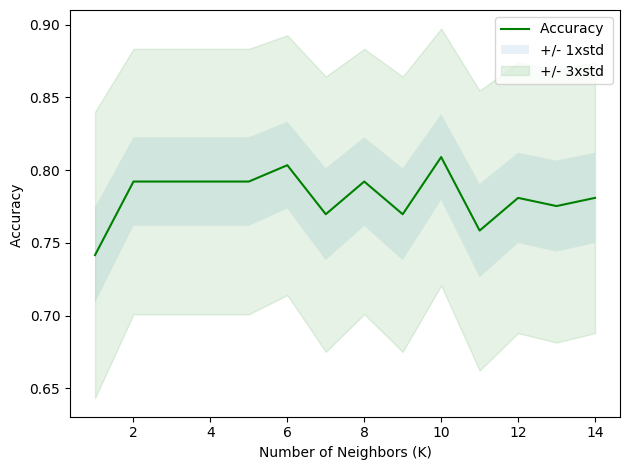

The best accuracy was with 0.8089887640449438 with k= 10


In [ ]:
# other kn
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#### Plot the model accuracy for a different number of neighbors.

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
# Linear SVM classifier
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
y_pred_SVM_linear = linear_svm.predict(X_test)
linear_SVM_score = accuracy_score(y_test, y_pred_SVM_linear)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_SVM_linear))

SVM Accuracy: 0.797752808988764


In [ ]:
#non_linear_SVM :
nonlinear_svm = SVC(kernel='rbf', C=1, gamma=0.1)
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)
nonlinear_SVM_score = accuracy_score(y_test, y_pred_nonlinear)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_nonlinear))


SVM Accuracy: 0.8089887640449438


In [ ]:
# Decision Tree
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
Tree_score = accuracy_score(y_test, pred_tree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  0.8146067415730337


In [ ]:
# ANN model

ANN_model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
ANN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ANN_model.fit(X_train, y_train, epochs = 26,batch_size = 32, validation_data = (X_test, y_test))

ANN_score = ANN_model.evaluate(X_test, y_test)
print('Test Loss:', ANN_score[0])
print('Test Accuracy:', ANN_score[1])

Epoch 1/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5602 - loss: 0.6754 - val_accuracy: 0.6966 - val_loss: 0.6266
Epoch 2/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.6001 - val_accuracy: 0.7753 - val_loss: 0.5702
Epoch 3/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7348 - loss: 0.5717 - val_accuracy: 0.8034 - val_loss: 0.5312
Epoch 4/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7846 - loss: 0.5187 - val_accuracy: 0.8202 - val_loss: 0.5016
Epoch 5/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8215 - loss: 0.4961 - val_accuracy: 0.8202 - val_loss: 0.4810
Epoch 6/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7862 - loss: 0.4982 - val_accuracy: 0.8090 - val_loss: 0.4671
Epoch 7/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8192 - loss: 0.4568 - val_accuracy: 0.8090 - val_loss: 0.4561
Epoch 8/26
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: 0.4594 - val_accuracy: 0.8034 - val_loss

Streaming output truncated to the last 5000 lines.
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9074 - loss: 0.2453 - val_accuracy: 0.7921 - val_loss: 0.6309
Epoch 52/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9088 - loss: 0.2529 - val_accuracy: 0.8034 - val_loss: 0.6271
Epoch 53/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9173 - loss: 0.2279 - val_accuracy: 0.7921 - val_loss: 0.6330
Epoch 54/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9046 - loss: 0.2532 - val_accuracy: 0.8090 - val_loss: 0.6258
Epoch 55/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9009 - loss: 0.2529 - val_accuracy: 0.7978 - val_loss: 0.6190
Epoch 56/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9095 - loss: 0.2390 - val_accuracy: 0.7921 - val_loss: 0.6283
Epoch 57/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9073 - loss: 0.2313 - val_accuracy: 0.7921 - val_loss: 0.6266
Epoch 58/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0

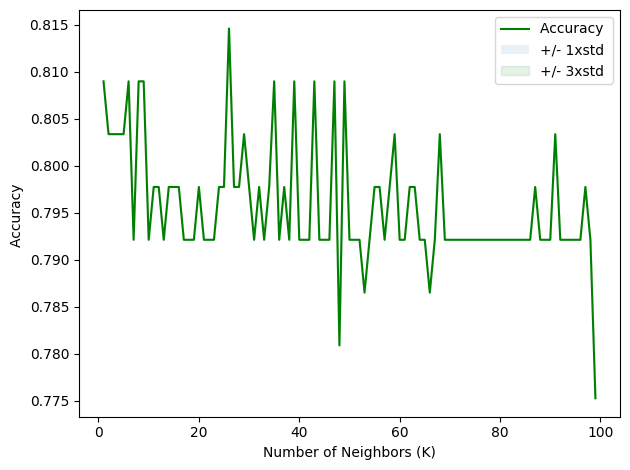

In [ ]:
# other epoches
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    ANN_model.fit(X_train, y_train, epochs = n ,batch_size = 32, validation_data = (X_test, y_test))

    mean_acc[n-1] =  (ANN_model.evaluate(X_test, y_test))[1]


mean_acc
#### Plot the model accuracy for a different number of epochs.

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of epochs')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with epochs=", mean_acc.argmax()+1)

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Linear SVM', 'Non-linear SVM',
              'Decision Tree', 'ANN'],
    'Score': [
        LR_score,
        KNN_score,
        linear_SVM_score,
        nonlinear_SVM_score,
        Tree_score,
        ANN_score[1]
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,ANN,0.820225
4,Decision Tree,0.814607
1,KNN,0.808989
3,Non-linear SVM,0.808989
0,Logistic Regression,0.797753
2,Linear SVM,0.797753


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_test.csv')
# replace 'Nan' values with 'no_cabin' in cabin feature
df_test['Cabin'].fillna('no_cabin', inplace=True)
#replace the missing value in the age featue with the median
median_value = df_test['Age'].median()  # Get the median value
df_test['Age'].fillna(median_value, inplace=True)
#drop column Name
df_test.drop(['Name'], axis=1, inplace=True)
#drop missing values

PassengerId = df_test['PassengerId'].copy() # Create a copy of PassengerId
df_test.drop(['PassengerId'],axis= 1, inplace = True)
df_test.drop(['Ticket','Cabin'], axis=1, inplace=True)

df_test['Sex'] = df_test['Sex'].map(custom_order)
df_test = full_pipeline.transform(df_test)

In [ ]:
Y =((ANN_model.predict(df_test)).round()).flatten()

submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Y
    })


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     417 non-null    float32
dtypes: float32(1), int64(1)
memory usage: 5.0 KB
